In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [2]:
#vacuum:
#probability:
#nve:
#dndE:
#v_function:

In [75]:
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T=.248

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+3)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T

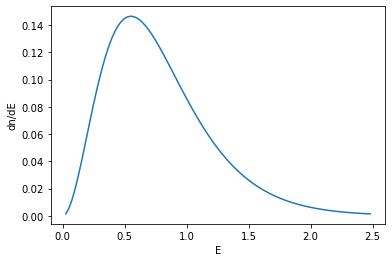

In [76]:
plt.figure()
plt.plot(Eval*T, der.dndE(ym0, Eval*T))
plt.xlabel("E")
plt.ylabel("dn/dE")
plt.show()

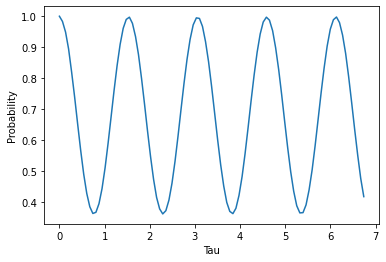

In [77]:
t0= 0
y0= der.array_maker(ym0)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(y0,y0,p)))
N_step = 100               
dN = 50
tau_final=10
t_final = tau_final*2*2.2/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

prob_ve= der.probability(ym0, Eval, t, y)
tau= (dm2/(2*2.2))*t

plt.figure()
plt.plot(tau, prob_ve)
plt.xlabel("Tau")
plt.ylabel("Probability")
plt.show()

In [38]:
print(dt0)

239999999999.99997


4.1666666666666674e-14